# 2편-(2). 불순도 기반 Feature Importance는 진짜 연속형 변수를 선호할까?

사용한 데이터: [Adult Census Income](https://www.kaggle.com/uciml/adult-census-income) data


데이터 전처리는 [이곳](https://github.com/Soohee410/Interpretable-Machine-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%98%20%ED%95%B4%EC%84%9D%5D%20Adult%20Census%20income%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb) 에 있습니다.

---

## 랜덤포레스트 적용 및 Feature Importance

In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
matplotlib.rcParams['figure.dpi'] = 100

df = pd.read_csv("adult_new.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,2,Separate,Exec-managerial,Not-in-family,White,Female,0,4356,18,US,<=50K
1,54,Private,140359,HS-under,1,Separate,Machine-op-inspct,Unmarried,White,Female,0,3900,40,US,<=50K
2,41,Private,264663,College,3,Separate,Prof-specialty,Own-child,White,Female,0,3900,40,US,<=50K
3,34,Private,216864,HS-grad,2,Separate,Other-service,Unmarried,White,Female,0,3770,45,US,<=50K
4,38,Private,150601,HS-under,1,Separate,Adm-clerical,Unmarried,White,Male,0,3770,40,US,<=50K


In [6]:
y = df.income
X = df.drop(['income','fnlwgt','education'],axis=1)

#categorical features labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

for i in ['workclass','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']:
    X[i] = le.fit_transform(X[i])
    X[i] = X[i].astype('category')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

### (1) 과적합시킨 랜포

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=300, random_state=0).fit(X_train, y_train)
print('train set accuracy: ',metrics.accuracy_score(y_train, rf.predict(X_train)))
print('test set accuracy: ', metrics.accuracy_score(y_test, rf.predict(X_test)))

train set accuracy:  0.9793090621658065
test set accuracy:  0.8438923844651768


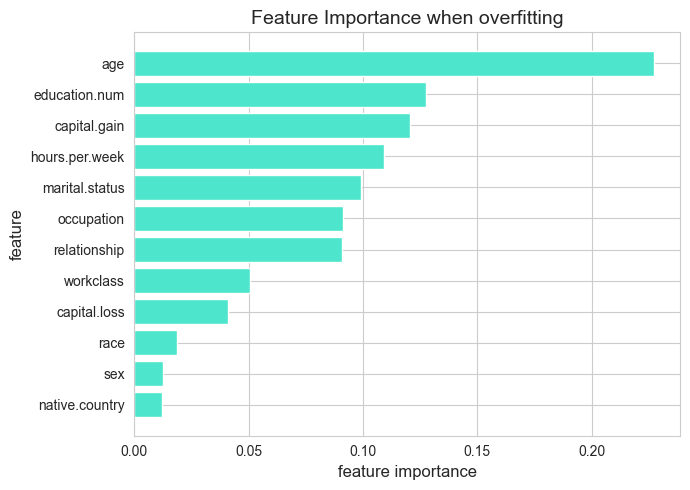

In [35]:
importance = pd.DataFrame(rf.feature_importances_, columns=['importance'])
importance.index = X_train.columns.tolist()
importance = importance.sort_values(by='importance')

plt.figure(figsize=(7,5))
plt.barh(importance.index, importance.importance, align='center', color=(0.3,0.9,0.8))
plt.xlabel('feature importance', size=12)
plt.ylabel('feature', size=12)
plt.title('Feature Importance when overfitting', size=14)
plt.tight_layout()

### (2) max-depth=15 설정 후 랜포

In [36]:
rf1 = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=15).fit(X_train, y_train)
print('train set accuracy: ',metrics.accuracy_score(y_train, rf1.predict(X_train)))
print('test set accuracy: ', metrics.accuracy_score(y_test, rf1.predict(X_test)))

train set accuracy:  0.9086808945924583
test set accuracy:  0.8600564113690605


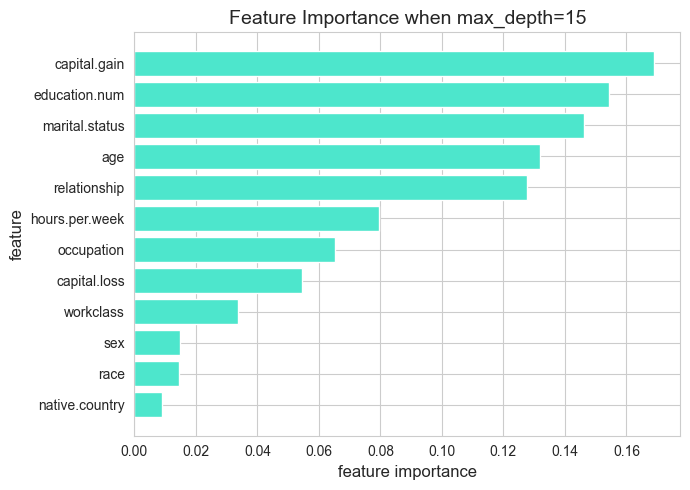

In [38]:
importance = pd.DataFrame(rf1.feature_importances_, columns=['importance'])
importance.index = X_train.columns.tolist()
importance = importance.sort_values(by='importance')

plt.figure()
plt.barh(importance.index, importance.importance, align='center', color=(0.3,0.9,0.8))
plt.xlabel('feature importance', size=12)
plt.ylabel('feature', size=12)
plt.title('Feature Importance when max_depth=15', size=14)
plt.tight_layout()

### (3) max-depth=10 설정 후 랜포

In [39]:
rf2 = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=10).fit(X_train, y_train)
print('train set accuracy: ',metrics.accuracy_score(y_train, rf2.predict(X_train)))
print('test set accuracy: ', metrics.accuracy_score(y_test, rf2.predict(X_test)))

train set accuracy:  0.8712512205328498
test set accuracy:  0.8568019093078759


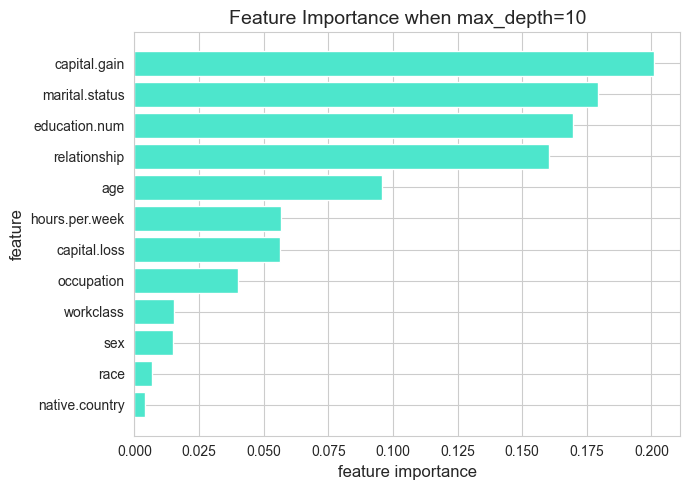

In [40]:
importance = pd.DataFrame(rf2.feature_importances_, columns=['importance'])
importance.index = X_train.columns.tolist()
importance = importance.sort_values(by='importance')

plt.figure(figsize=(7,5))
plt.barh(importance.index, importance.importance, align='center', color=(0.3,0.9,0.8))
plt.xlabel('feature importance', size=12)
plt.ylabel('feature', size=12)
plt.title('Feature Importance when max_depth=10', size=14)
plt.tight_layout()

### (4)  max-depth=6로 설정 후 랜포

In [41]:
rf3 = RandomForestClassifier(n_estimators=300, random_state=0, max_depth=6).fit(X_train, y_train)
print('train set accuracy: ',metrics.accuracy_score(y_train, rf3.predict(X_train)))
print('test set accuracy: ', metrics.accuracy_score(y_test, rf3.predict(X_test)))

train set accuracy:  0.853629051006649
test set accuracy:  0.8496420047732697


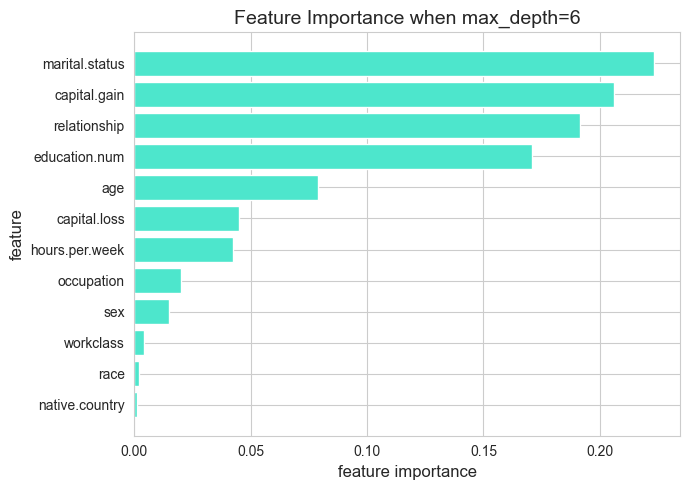

In [42]:
importance = pd.DataFrame(rf3.feature_importances_, columns=['importance'])
importance.index = X_train.columns.tolist()
importance = importance.sort_values(by='importance')

plt.figure(figsize=(7,5))
plt.barh(importance.index, importance.importance, align='center', color=(0.3,0.9,0.8))
plt.xlabel('feature importance', size=12)
plt.ylabel('feature', size=12)
plt.title('Feature Importance when max_depth=6', size=14)
plt.tight_layout()